# Logistic Regression without Feature Selection

In [1]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Reading the dataset
data=pd.read_csv('loans.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Checking the null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
#Checking the data types
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
# Fill missing categorical values with mode
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [6]:
# Fill missing numerical values with median
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']:
    data[col].fillna(data[col].median(), inplace=True)

In [7]:
#Checking the null values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
#Checking duplicated rows
data.duplicated().sum()

0

In [9]:
#Dropping the categorical Loan_ID Column
data.drop(['Loan_ID'],axis=1,inplace=True)

In [10]:
#Converting categorical values to numerical using OneHotEncoder
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed','Education','Property_Area','Loan_Status']:
    enc=OneHotEncoder()
    data[col]=data[col].astype('category')
    data[col]=data[col].cat.codes
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [11]:
#Applying Normalization
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [12]:
#Input and Output labels
x=data.copy()
x.drop(['Loan_Status'],axis=1,inplace=True)
y=data['Loan_Status']

In [13]:
#Splitting the data set into train set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=False)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


In [14]:
#Importing LogisticRegression classifier and fitting the data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [15]:
#Prediction
y_pred = clf.predict(x_test)
y_pred

array([1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0.])

In [16]:
#Acuracy
acc = accuracy_score(y_test, clf.predict(x_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 82.11%


In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.46      0.62        39
         1.0       0.80      0.99      0.88        84

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.85      0.82      0.80       123



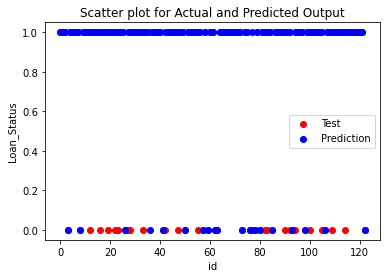

In [18]:
#Drawing a Scatter Plot for actual and predicted output w.r.t Id
id = [i for i in range(len(y_test))]
plt.scatter(id, y_test, color="red", label="Test")
plt.scatter(id, y_pred, color="blue", label="Prediction")
plt.xlabel("id")
plt.ylabel("Loan_Status")
plt.legend()
plt.title("Scatter plot for Actual and Predicted Output")# Adding a title to the plot
plt.show()

In [19]:
#Predicting on unseen data
import random
unseen = pd.DataFrame(data = [[random.random() for i in range(x_test.shape[1])]], columns = x_test.columns)
unseen.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.562593,0.933359,0.4705,0.55199,0.207358,0.63726,0.45537,0.867189,0.880118,0.713086,0.196271


In [20]:
y_pred = clf.predict(unseen)
y_pred

array([0.])